# DSLabs functions

In [1]:
%run "scripts/dslabs_functions.py"


# Data functions

In [2]:
%run "scripts/data_functions.py"

import pandas as pd
import numpy as np



data_functions lodaded


# Load

In [4]:
test_data=True
# test_data=False


file_tag = "Gira Bike"


train=pd.read_csv(f"data/df_gira_agg_2h_final_train.csv", decimal=".",  index_col='Date', parse_dates=True,  infer_datetime_format=True)

test=pd.read_csv(f"data/ddf_gira_agg_2h_final_test.csv", decimal=".",  index_col='Date', parse_dates=True,  infer_datetime_format=True)

target='target_station_load_rate'

# Prepare the training and testing data from dataframes with features and target
trnX = train.drop(columns=[target])
trnY = train[target]
tstX = test.drop(columns=[target])
tstY = test[target]


from numpy import arange

# Ensure no data leakage
assert not set(train.index).intersection(set(test.index)), "Data leakage detected: Train and test sets overlap."


# # Prepare the training and testing data using the time index as the feature
# trnX = arange(len(train)).reshape(-1, 1)
# trnY = train[target].to_numpy()
# tstX = arange(len(train), len(train+test)).reshape(-1, 1)
# tstY = test[target].to_numpy()



train.info()

ValueError: 'Date' is not in list

## Simple Average

## Simple Average evaluate

In [ ]:
from sklearn.base import RegressorMixin


class SimpleAvgRegressor(RegressorMixin):
    def __init__(self):
        super().__init__()
        self.mean: float = 0.0
        return

    def fit(self, X: Series):
        self.mean = X.mean()
        return

    def predict(self, X: Series) -> Series:
        prd: list = len(X) * [self.mean]
        prd_series: Series = Series(prd)
        prd_series.index = X.index
        return prd_series

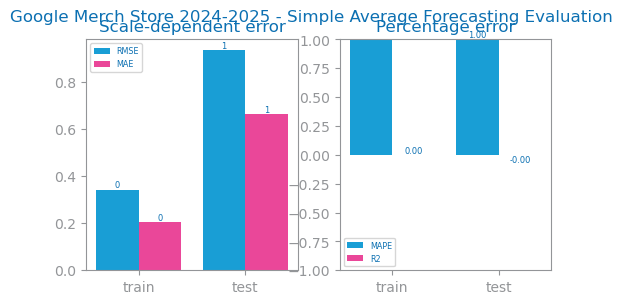

In [ ]:

import pandas as pd

# Fit the Model
model = SimpleAvgRegressor()
model.fit(pd.Series(trnY))

# Predict the training and testing data
prd_trn = pd.Series(model.predict(pd.Series(trnY)), index=train.index)
prd_tst = pd.Series(model.predict(pd.Series(tstY)), index=test.index)

# Plot the forecasting evaluation
plot_forecasting_eval(train[target], test[target], prd_trn, prd_tst, title=f"{file_tag} - Simple Average Forecasting Evaluation")
savefig(f"images/{file_tag}_simple_average_evaluation.png")